# News Mood

# Analysis

##### Note*: Analysis was given upon the data retrieved on 3/19/2018
 
## Observed Trend 1:
Utilizing Vader Sentiment Analyzer, the review of last 100 Tweets by top medias shows CBS tweets have considerably higher compound sentiment score than BBC, Fox News, the New York Times and CNN.

## Observed Trend 2:
New York Times' last 100 tweets was the closest to neutral among all other medias

## Observed Trend 3:
Fox's tweets are more likely to be negative in where also has the lowest compound sentiment score

In [1]:
# Import dedendencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import time
import tweepy
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Setup Target User Accounts
target_user = ('@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes')

In [5]:
# A list to hold tweet timestamps
user_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
text_list = []
date_list = []

# Loop through each user
for user in target_user:
    
    # For at least 100 tweets
    public_tweets = api.user_timeline(user, count=100)
        
    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
         
        # Add each value to the appropriate array
        user_list.append(user)
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        text_list.append(tweet["text"])
        date_list.append(tweet["created_at"])

In [6]:
# Creating dictionary for DataFrame
dic = {"Media": user_list,
       "Date": date_list,
       "Text": text_list,
       "Compound": compound_list,
       "Positive": positive_list,
       "Neutral": neutral_list,
       "Negative": negative_list}

df = pd.DataFrame(dic, columns = ['Media',
                                  'Text',
                                  'Date',
                                  'Compound',
                                  'Positive',
                                  'Neutral',
                                  'Negative'])
df.head()

,Media,Text,Date,Compound,Positive,Neutral,Negative
0,@BBC,Follow the dramatic and deadly series of event...,Mon Mar 19 19:33:04 +0000 2018,-0.3818,0.000,0.890,0.110
1,@BBC,Leonardo DiCaprio stars in the true story of a...,Mon Mar 19 18:33:05 +0000 2018,0.1531,0.175,0.709,0.116
2,@BBC,😂📸 @AlanCarr learned the hard way that you onl...,Mon Mar 19 18:03:01 +0000 2018,-0.1027,0.000,0.920,0.080
3,@BBC,🎤Pop band @FifthHarmony have announced they're...,Mon Mar 19 17:30:08 +0000 2018,0.0000,0.000,1.000,0.000
4,@BBC,Murder. Innocence. Lies. \n\n@AgathaChristie c...,Mon Mar 19 17:00:05 +0000 2018,-0.7096,0.144,0.442,0.414


In [7]:
# save df to csv
df.to_csv("NewsMood.csv")

In [8]:
tweet_ago = list(reversed( range(0,100) ))
len(tweet_ago)

100

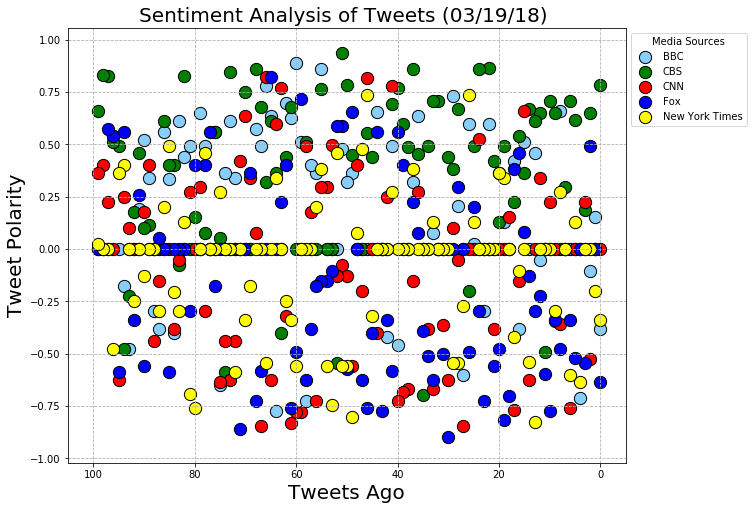

In [9]:
# Create "Tweet Ago" list of 0-100
tweet_ago = list(range(0,100))

# Setup plot size
plt.figure(figsize=(10,8))
plt.xlim(105, -5)

# Plot each list of Compound scores
plt.scatter(tweet_ago, df[df['Media']=='@BBC']['Compound'], s = 150, marker ='o', color='lightskyblue', label = 'BBC', edgecolors = 'black')
plt.scatter(tweet_ago, df[df['Media']=='@CBS']['Compound'], s = 150, marker ='o', color='green', label = 'CBS', edgecolors = 'black')
plt.scatter(tweet_ago, df[df['Media']=='@CNN']['Compound'], s = 150, marker ='o', color='red', label = 'CNN', edgecolors = 'black')
plt.scatter(tweet_ago, df[df['Media']=='@FoxNews']['Compound'], s = 150, marker ='o', color='blue', label = 'Fox', edgecolors = 'black')
plt.scatter(tweet_ago, df[df['Media']=='@nytimes']['Compound'], s = 150, marker ='o', color='yellow', label = 'New York Times', edgecolors = 'black')

# Set title and axis labels
plt.title("Sentiment Analysis of Tweets (%s) " % (time.strftime("%x")), fontsize=20)
plt.xlabel('Tweets Ago', fontsize=20)
plt.ylabel('Tweet Polarity', fontsize=20)

plt.legend(bbox_to_anchor=(1, 1),title='Media Sources')

plt.grid(linestyle="dashed")

plt.show()
plt.savefig("Output_scatter")

In [10]:
x_axis = np.arange(len(target_user))
x_axis

array([0, 1, 2, 3, 4])

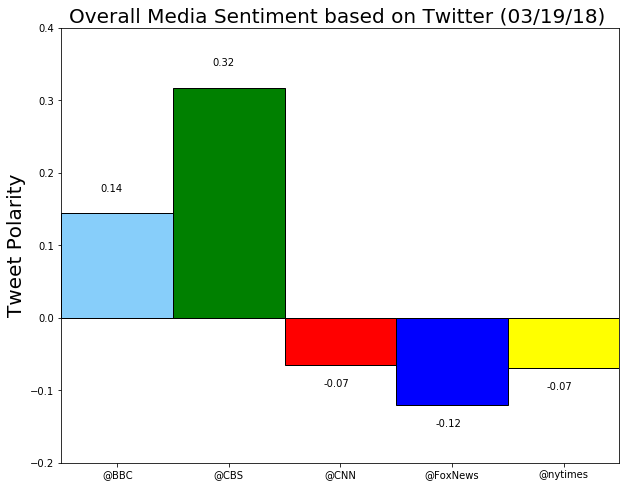

In [11]:
plt.figure(figsize=(10,8))

x_axis = np.arange(len(target_user))

# Create a bar chart based upon the above data
bbc = plt.bar(0, df[df['Media']=='@BBC']['Compound'].mean(), color='lightskyblue', alpha=1, align="edge", ec="black", width=1)
cbs = plt.bar(1, df[df['Media']=='@CBS']['Compound'].mean(), color='green', alpha=1, align="edge", ec="black", width=1)
cnn = plt.bar(2, df[df['Media']=='@CNN']['Compound'].mean(), color='red', alpha=1, align="edge", ec="black", width=1)
fox = plt.bar(3, df[df['Media']=='@FoxNews']['Compound'].mean(), color='blue', alpha=1, align="edge", ec="black", width=1)
nyt = plt.bar(4, df[df['Media']=='@nytimes']['Compound'].mean(), color='yellow', alpha=1, align="edge", ec="black", width=1)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.5 for value in x_axis]
plt.xticks(tick_locations, target_user)

# Add limits, title, x/y label, and Grid
plt.xlim(0, 5)
plt.ylim(-0.2, 0.4)

compond_mean_list = (df[df['Media']=='@BBC']['Compound'].mean(), 
                      df[df['Media']=='@CBS']['Compound'].mean(), 
                      df[df['Media']=='@CNN']['Compound'].mean(),
                      df[df['Media']=='@FoxNews']['Compound'].mean(),
                      df[df['Media']=='@nytimes']['Compound'].mean())

# Add text to each bar
for i, v in enumerate(compond_mean_list):
    if v < 0:
        plt.text(i+0.35, v-.03, str(round(v,2)))
    else:
        plt.text(i+0.35, v+.03, str(round(v, 2)))

plt.title("Overall Media Sentiment based on Twitter (%s) " % (time.strftime("%x")), fontsize=20)
plt.ylabel("Tweet Polarity", fontsize=20)

plt.show()
plt.savefig("Output_bar")